In [30]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [31]:

def dilation_mapping(X, d):
    result = X[0::d]
    for i in range(1, d):
        next = X[i::d]
        result = np.concatenate((result, next))
    return result

# Arguments:
ts = np.array([0, 1, 3, 2, 9, 1, 14, 15, 1, 3, 2, 10, 7]).astype(np.float64)
window_size = 3
d = 2

mp_orig = stumpy.stump(ts, m=window_size)

# 1. TS -dilationMaping-> dilated TS
ts_d = dilation_mapping(ts, d)
print(f"TS: {ts}")
print(f"TS dilated: {ts_d}")

# 2. dilated TS, m -stumpy-> MP 
mp_dilated_unfixed = stumpy.stump(ts_d, m=window_size)
print(f"MP dilated unfixed:  {mp_dilated_unfixed}")

# 3. MP, NNIndex -dilationMapping-> fixedMP
mp_dilated_fixed = dilation_mapping(mp_dilated_unfixed, d)
print(f"MP dilated fixed: {mp_dilated_fixed}")

# 4. Test Use Cases
# ...



# mp[mp_idx, 0] -> Euclidean Distance
# mp[mp_idx, 1] -> Index Nearest Neighbor
# mp[mp_idx, 2] -> Index “left” Nearest Neighbor
# mp[mp_idx, 3] -> Index “right” Nearest Neighbor

TS: [ 0.  1.  3.  2.  9.  1. 14. 15.  1.  3.  2. 10.  7.]
TS dilated: [ 0.  3.  9. 14.  1.  2.  7.  1.  2.  1. 15.  3. 10.]
MP dilated unfixed:  [[0.3066841539295147 4 -1 4]
 [0.7218894111653943 4 -1 4]
 [0.8568251999987905 5 0 5]
 [0.15065019676419264 6 0 6]
 [0.3066841539295147 0 0 8]
 [0.27023144361166235 7 2 7]
 [0.15065019676419264 3 3 10]
 [0.22925042427098186 9 5 9]
 [0.3806948517151358 4 4 10]
 [0.22925042427098186 7 7 -1]
 [0.7953884632772492 6 6 -1]]
MP dilated fixed: [[0.3066841539295147 4 -1 4]
 [0.8568251999987905 5 0 5]
 [0.3066841539295147 0 0 8]
 [0.15065019676419264 3 3 10]
 [0.3806948517151358 4 4 10]
 [0.7953884632772492 6 6 -1]
 [0.7218894111653943 4 -1 4]
 [0.15065019676419264 6 0 6]
 [0.27023144361166235 7 2 7]
 [0.22925042427098186 9 5 9]
 [0.22925042427098186 7 7 -1]]


### Visualise Discord and Motif Pair ###

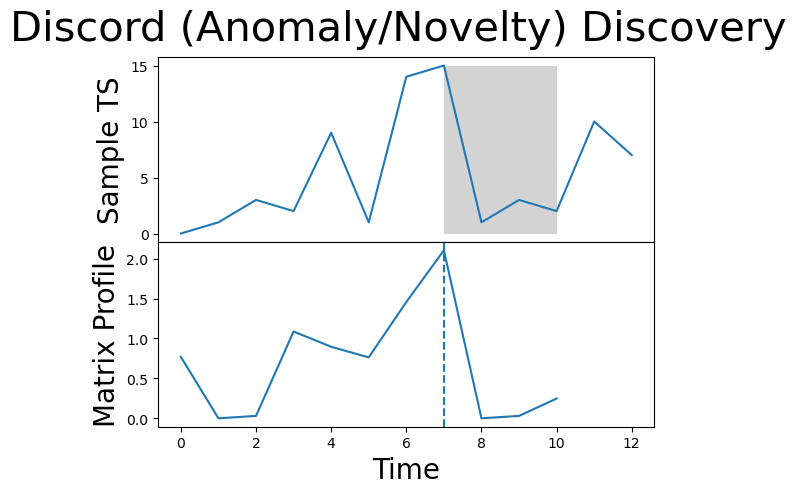

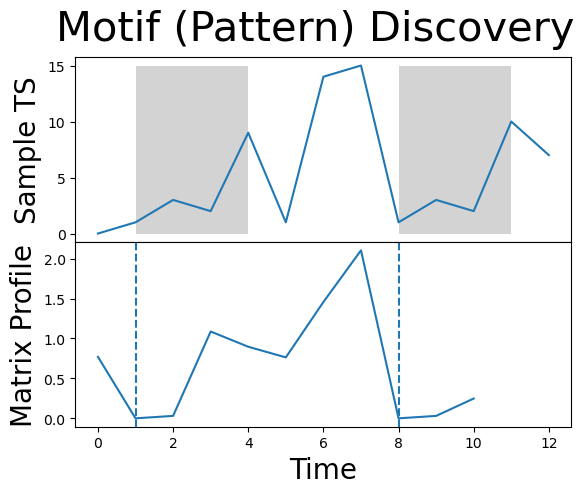

In [32]:
mp = mp_orig

def visualise_discord(mp):
    # the global maximum from the matrix profile correspond to the discord
    discord_idx = np.argsort(mp[:, 0])[-1] # startindex of discord with length m

    ## Visualize Discord ##
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

    axs[0].plot(ts)
    axs[0].set_ylabel('Sample TS', fontsize='20')
    rect = Rectangle((discord_idx, 0), window_size, np.amax(ts), facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=discord_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()
def visualise_motif_pair(mp) -> None:
    # the global minima from the matrix profile correspond to the locations of the two subsequences that make up the motif pair
    motif_idx = np.argsort(mp[:, 0])[0] # startindex of motif with length m
    motif_nearest_neighbor_idx = mp[motif_idx, 1] # startindex of motif with length m

    ## Visualize Motifs ##
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

    axs[0].plot(ts)
    axs[0].set_ylabel('Sample TS', fontsize='20')
    rect = Rectangle((motif_idx, 0), window_size, np.amax(ts), facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((motif_nearest_neighbor_idx, 0), window_size, np.amax(ts), facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=motif_nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()

visualise_discord(mp)
visualise_motif_pair(mp)